To run this code on the full set of LCS, use MakeColmanPNGfiles.py

In [91]:
import glob, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
%matplotlib inline 
import time
from IPython.display import Image #this allows us to look at some periodograms 
from K2fov import plot
import matplotlib.patheffects as path_effects
pd.set_option('display.max_columns', 500)

from astropy.io import fits
from astropy.table import Table 

#astropy statistics
from astropy.stats import median_absolute_deviation
#astrobase
import astrobase
from astrobase import periodbase, checkplot


import mesa_reader as mr #for some stellar tracks later

#Live dangerously
import warnings
warnings.filterwarnings("ignore")

For each of the Colman light curves, I am going to make a super PNG that will give us lots of information. This will help us with the candidate selection process for follow-up purposes.

I'd like an image of where the target is on the Kepler channel in relation to all Isabel's targets. I'd also like all the information from the catalog we produced about her sources: 

First I use a script outside the Notebook to generate pkl-png files (because periodograms are time consuming), then I convert them to png files inside this notebook. I can import these images for the super PNG.

Now we can create the master png for each source 

2297113
/Users/melinda/Dropbox/Research_NGC6791/Colman_PNG_Full_files/2297113.png
1360.0 seconds |  22.7 minutes
____________________________________


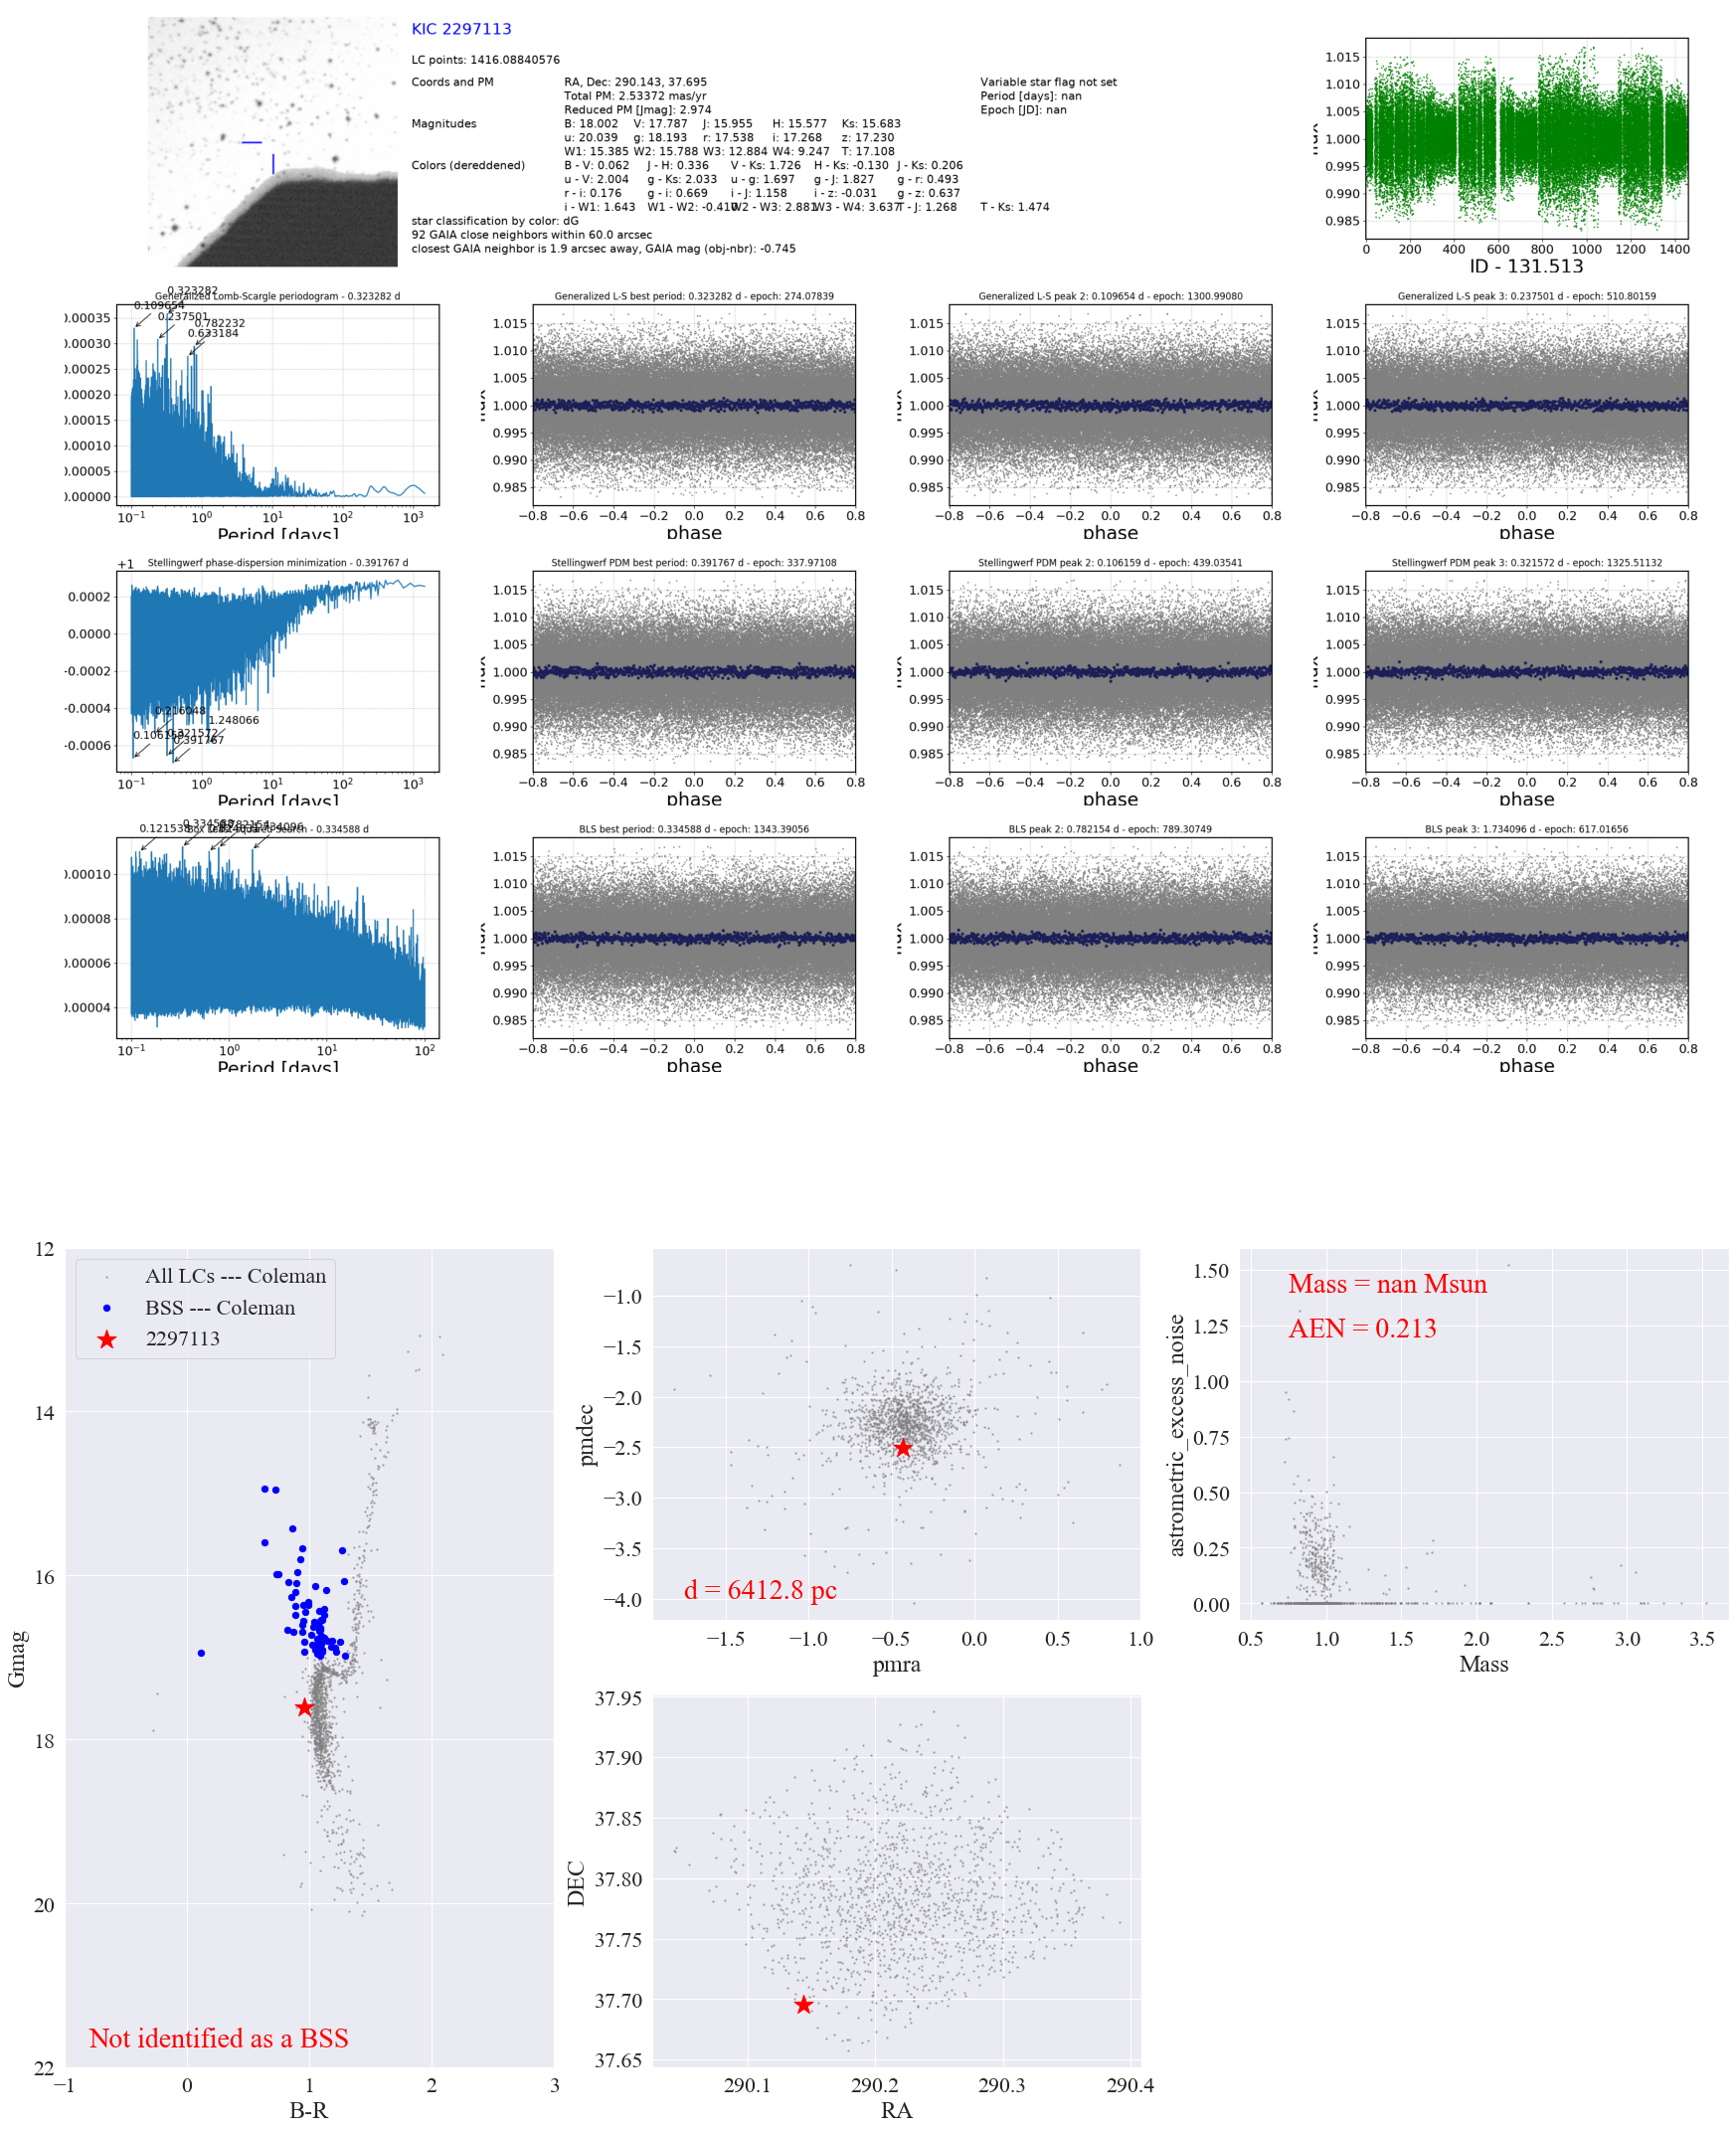

In [123]:
%matplotlib inline 

df=pd.read_table('ColmanTable_NGC6791_FullTable.dat',delimiter=' ')  
df_BSS=df[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5]
PNGfilesin=sorted(glob.glob('/Users/melinda/Dropbox/Research_NGC6791/Colman_PNG_files/*.png'))

sns.set(font_scale=2.0) 
sns.set_style({'font.family': 'Times New Roman'})

for i in range(0,1): #len(PNGfilesin)):
    ID=PNGfilesin[i].split(".png",1)[0]
    ID=ID.split("files/",1)[1]
    print(ID)
    idx = (df['KEPID'] == float(ID)).idxmax()
    
    fig = plt.figure(figsize=(30,40),frameon=False)
    ax0 = plt.subplot2grid((5, 3), (0, 0), colspan=3,rowspan=3)
    ax1 = plt.subplot2grid((5, 3), (3, 0), colspan=1,rowspan=2)
    ax2 = plt.subplot2grid((5, 3), (3,1))
    ax3 = plt.subplot2grid((5, 3), (3,2))
    ax4 = plt.subplot2grid((5, 3), (4, 1))

    img1 = mpimg.imread(PNGfilesin[i])
    ax0.imshow(img1)
    ax0.axis('off')

    ax1.scatter(df.bp_rp,df.Gmag,c='grey',s=2.0,alpha=0.5,label='All LCs --- Coleman')
    ax1.scatter(df.bp_rp[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],\
                df.Gmag[(df.Gmag<17)&(df.bp_rp<1.3)&df.bp_rp>0.5],\
                c='blue',s=40,label='BSS --- Coleman')
    if ID in df_BSS['KEPID']:
        ax1.annotate('Identified as a BSS', xy=(-0.8, 21.75), size=28,color='green')
        ax1.scatter(df.bp_rp[df.KEPID==float(ID)],df.Gmag[df.KEPID==float(ID)],marker='*',color='green',s=400,label=str(ID))
    else:
        ax1.annotate('Not identified as a BSS', xy=(-0.8, 21.75), size=28,color='red')
        ax1.scatter(df.bp_rp[df.KEPID==float(ID)],df.Gmag[df.KEPID==float(ID)],marker='*',color='red',s=400,label=str(ID))
    ax1.set_xlim(-1,3)
    ax1.set_ylim(22,12)
    ax1.set_ylabel('Gmag')
    ax1.set_xlabel('B-R')
    ax1.legend()

    ax2.scatter(df.pmra,df.pmdec,c='grey',s=2.0,alpha=0.5)
    dist=round(1/(df.parallax[idx]*1.0e-3),1)
    tmp='d = '+str(dist)+' pc'
    if ID in df_BSS['KEPID']:
        ax2.scatter(df.pmra[df.KEPID==float(ID)],df.pmdec[df.KEPID==float(ID)],marker='*',color='green',s=400)
        tmp='d ='+str(dist)+'pc'
        ax2.annotate(tmp, xy=(-1.75, -4), size=28,color='green')
    else:
        ax2.scatter(df.pmra[df.KEPID==float(ID)],df.pmdec[df.KEPID==float(ID)],marker='*',color='red',s=400)
        ax2.annotate(tmp, xy=(-1.75, -4), size=28,color='red')
    ax2.set_ylabel('pmdec')
    ax2.set_xlabel('pmra')

    ax3.scatter(df.Mass,df.astrometric_excess_noise,c='grey',s=2.0,alpha=0.5)
    mass=df.Mass[idx]
    aen=round(df.astrometric_excess_noise[idx],3)
    tmp='Mass = '+str(mass)+' Msun'
    tmp2='AEN = '+str(aen)
    if ID in df_BSS['KEPID']:
        ax3.scatter(df.Mass[df.KEPID==float(ID)],df.astrometric_excess_noise[df.KEPID==float(ID)],\
                    marker='*',color='green',s=400)
        ax3.annotate(tmp, xy=(0.75, 1.4), size=28,color='green')
        ax3.annotate(tmp2, xy=(0.75, 1.2), size=28,color='green')
    else:
        ax3.scatter(df.Mass[df.KEPID==float(ID)],df.astrometric_excess_noise[df.KEPID==float(ID)],\
                marker='*',color='red',s=400)
        ax3.annotate(tmp, xy=(0.75, 1.4), size=28,color='red')
        ax3.annotate(tmp2, xy=(0.75, 1.2), size=28,color='red')
    ax3.set_ylabel('astrometric_excess_noise')
    ax3.set_xlabel('Mass')

    ax4.scatter(df.RA,df.DEC,c='grey',s=2.0,alpha=0.5)
    if ID in df_BSS['KEPID']:
        ax4.scatter(df.RA[df.KEPID==float(ID)],df.DEC[df.KEPID==float(ID)],marker='*',color='green',s=400)
    else:
        ax4.scatter(df.RA[df.KEPID==float(ID)],df.DEC[df.KEPID==float(ID)],marker='*',color='red',s=400)
    ax4.set_ylabel('DEC')
    ax4.set_xlabel('RA')

    fig.savefig(outfile3, dpi=150)
    print(outfile3)
    print(round((time.time() - start_time),1),'seconds | ',round((time.time() - start_time)/60.0,1),'minutes')
    print('____________________________________')
